# 🧭 Project Focus: Driving Business Insights from Sales Patterns

This project aims to uncover actionable insights from the **sales data of a global superstore**.  
By analyzing customer behavior, product performance, and regional sales trends, we provide a strategic view of the company’s revenue drivers.

### 📌 Business Objectives:
- Identify high-performing **regions and states** based on sales
- Understand which **product categories and sub-categories** generate the most revenue
- Explore how **customer segments** contribute to overall sales
- Analyze the influence of **shipping modes** on order patterns
- Track **monthly sales trends** to understand seasonal performance

These insights support decisions in **marketing strategy**, **inventory planning**, and **customer segmentation**, helping the business optimize for growth.

# **1. Load & Inspect the dataset**

In [2]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📥 Load the dataset
df = pd.read_csv('/kaggle/input/sales-forecasting/train.csv')

# 🧾 View shape and columns
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.\n")
df.head()

Dataset has 9800 rows and 18 columns.



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## 🧾 Dataset Dictionary (Key Columns)

| Column Name      | Description |
|------------------|-------------|
| `Order Date`     | Date when the order was placed |
| `Ship Date`      | Date when the order was shipped |
| `Ship Mode`      | Mode of shipping (Standard, First Class, etc.) |
| `Customer ID`    | Unique customer identifier |
| `Segment`        | Customer segment (Consumer, Corporate, Home Office) |
| `Region`, `State`, `City` | Location details |
| `Category` & `Sub-Category` | Product classification |
| `Product Name`   | Name of the product sold |
| `Sales`          | Sales value in USD |


# **2. Basic Info Check**

In [3]:
# 🔍 Basic info and null check
df.info()

# 📉 Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

## 🌎 Regional and State-Level Sales Performance

Understanding which regions and states bring in the most revenue is crucial for setting regional sales targets and allocating marketing budgets.

- The **bar chart** below shows total sales grouped by region.
- The **horizontal chart** highlights the **top 10 states** contributing the highest sales.

This analysis supports decisions related to **regional marketing**, **logistics**, and **resource allocation**.


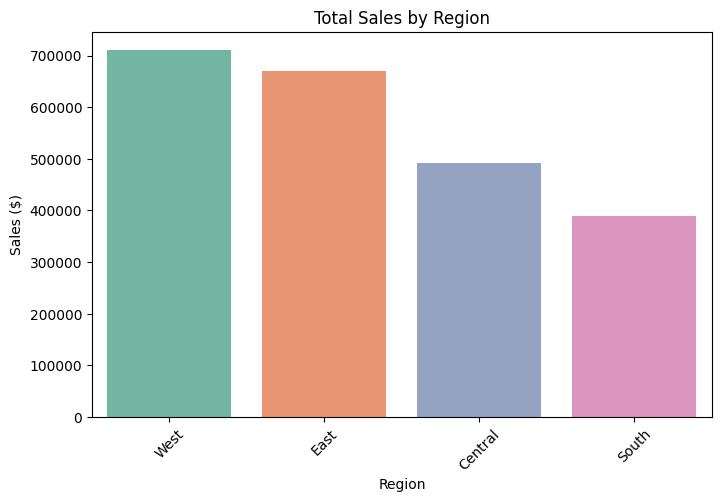

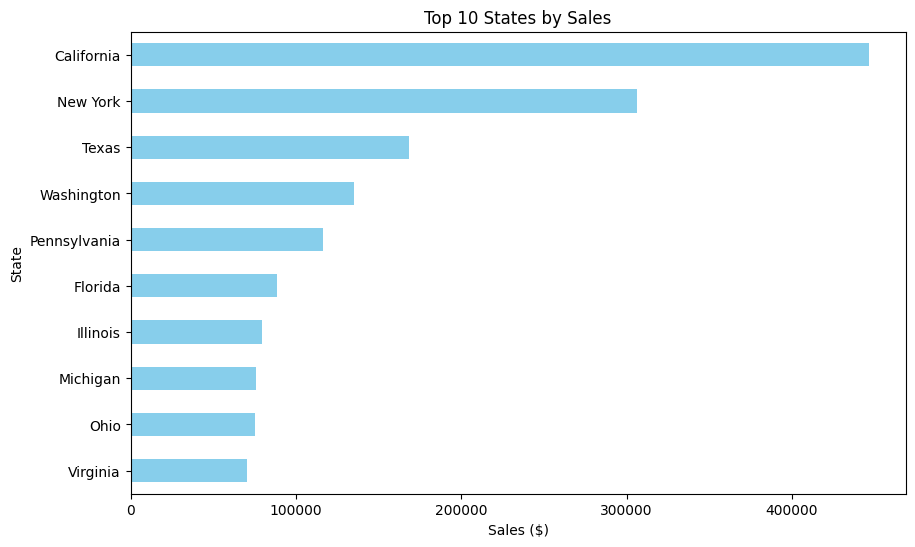

In [4]:
# 📍 Total Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# 📍 Total Sales by State
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# 📈 Plotting Sales by Region
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Set2')
plt.title('Total Sales by Region')
plt.ylabel('Sales ($)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

# 🗺️ Top 10 States by Sales
plt.figure(figsize=(10,6))
state_sales.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 States by Sales')
plt.xlabel('Sales ($)')
plt.gca().invert_yaxis()
plt.show()

## 📦 Product Category & Sub-Category Sales Performance

Analyzing product-level sales helps the business:

- Focus on **best-selling categories**
- Identify opportunities to **increase margins**
- Understand which sub-categories may need more attention or stocking

The charts below show total revenue grouped by **category** and by **sub-category**. This is key to driving **inventory and marketing strategy**.


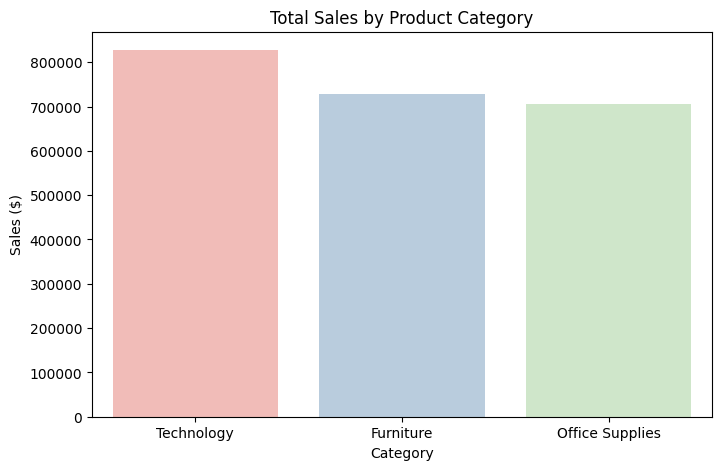

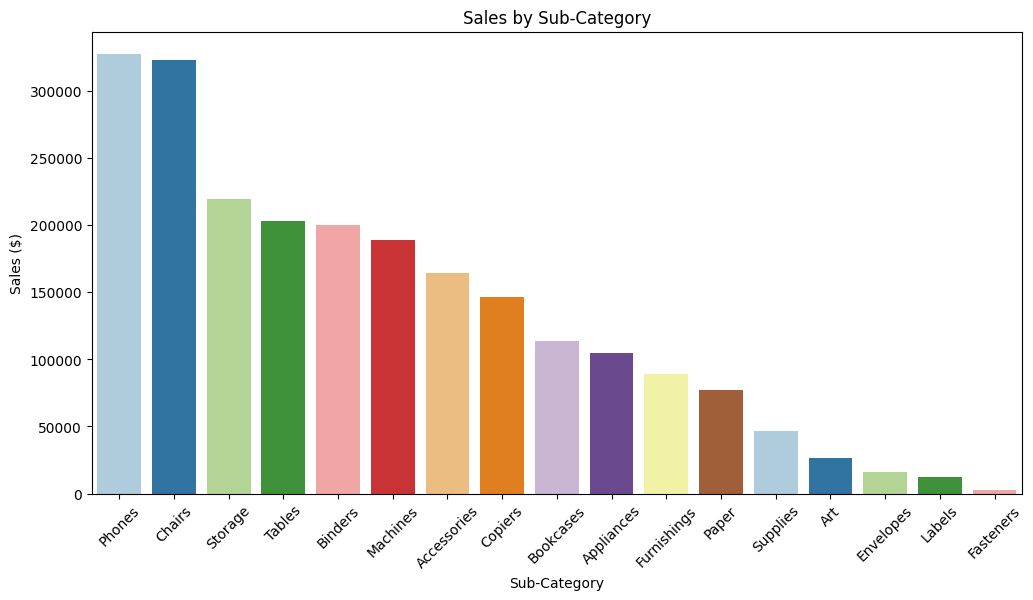

In [5]:
# 📦 Total Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# 🔍 Total Sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)

# 📈 Plotting Category-wise Sales
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='Pastel1')
plt.title('Total Sales by Product Category')
plt.ylabel('Sales ($)')
plt.xlabel('Category')
plt.show()

# 📊 Plotting Top Sub-Categories by Sales
plt.figure(figsize=(12,6))
sns.barplot(x=subcat_sales.index, y=subcat_sales.values, palette='Paired')
plt.title('Sales by Sub-Category')
plt.ylabel('Sales ($)')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45)
plt.show()

## 👥 Segment & Shipping Mode Sales Distribution

These charts provide insight into how different customer segments and shipping preferences influence sales:

- The **Segment** chart reveals who the top customers are — Corporate, Home Office, or Consumers.
- The **Shipping Mode** chart helps understand operational trends and cost drivers.

This information can guide **personalized marketing**, **targeted discounts**, or **shipping policy improvements**.

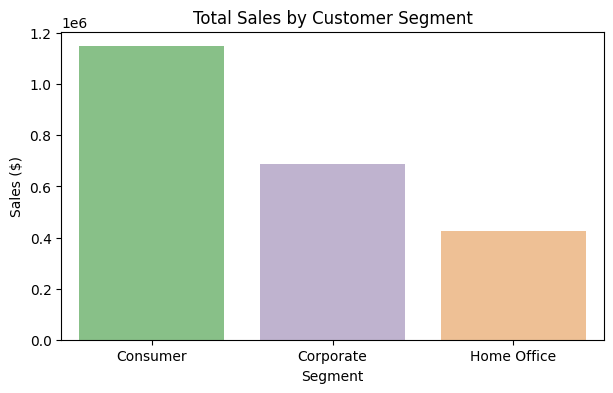

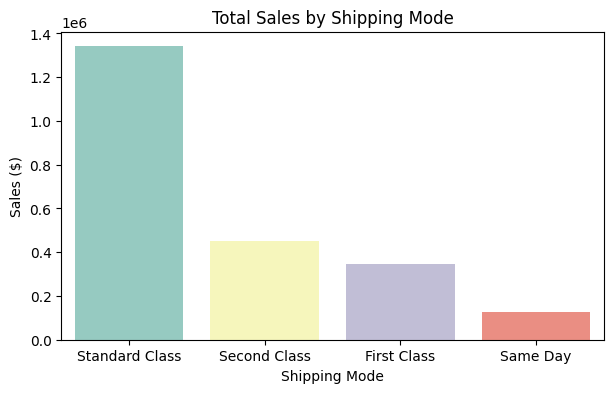

In [6]:
# 👥 Sales by Customer Segment
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

# 🚚 Sales by Shipping Mode
shipmode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

# 📈 Plotting Segment-wise Sales
plt.figure(figsize=(7,4))
sns.barplot(x=segment_sales.index, y=segment_sales.values, palette='Accent')
plt.title('Total Sales by Customer Segment')
plt.ylabel('Sales ($)')
plt.xlabel('Segment')
plt.show()

# 📦 Plotting Sales by Shipping Mode
plt.figure(figsize=(7,4))
sns.barplot(x=shipmode_sales.index, y=shipmode_sales.values, palette='Set3')
plt.title('Total Sales by Shipping Mode')
plt.ylabel('Sales ($)')
plt.xlabel('Shipping Mode')
plt.show()

## 📆 Monthly Sales Trend Over Time

Analyzing sales by month and year reveals **seasonal patterns** and **sales cycles**. Businesses can:

- Plan promotions during slow months
- Optimize inventory before peak seasons
- Track yearly growth month-to-month

The line chart below shows monthly sales patterns across different years.

In [8]:
# ✅ Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True, errors='coerce')

# ✅ Now extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month Name'] = df['Order Date'].dt.strftime('%b')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

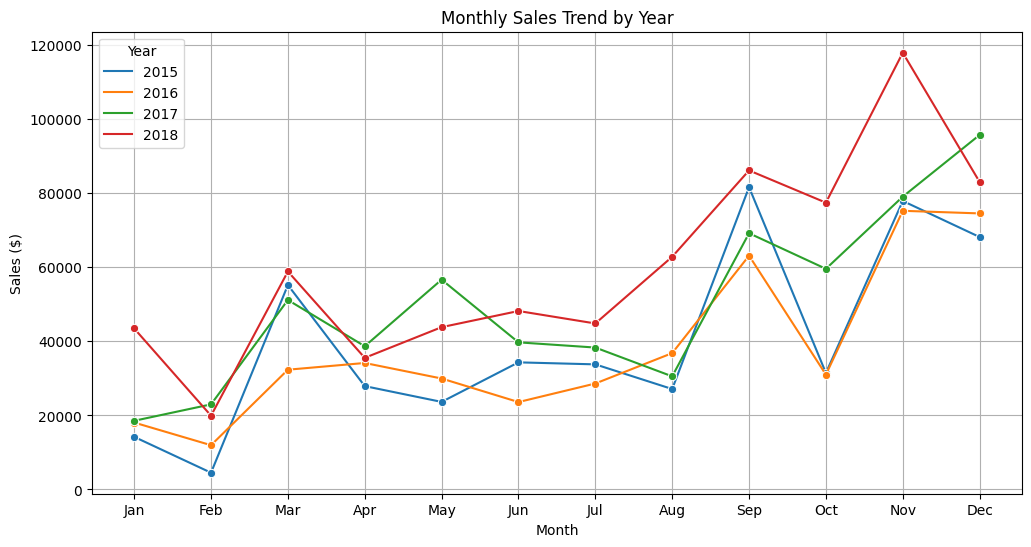

In [9]:
# 📅 Monthly Sales Across All Years
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Name'] = monthly_sales['Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%b'))

# Sort month order properly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'], categories=month_order, ordered=True)

# 📈 Lineplot: Monthly Sales Trend (All Years)
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month_Name', y='Sales', hue='Year', marker='o', palette='tab10')
plt.title('Monthly Sales Trend by Year')
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# 📅 Time-Based Sales Trend Analysis

Understanding **temporal patterns** in sales is crucial for inventory planning, staffing, and promotions.

## 🎯 Objective:
Identify how sales fluctuate across:
- 📆 Different months (seasonality)
- 📅 Days of the week (weekly patterns)
- 🗓️ Day of month
- 🧮 Yearly trend (if applicable)

## 🛠️ Why This Matters for Businesses:
- Helps in planning **promotions** and **discounts** at the right time.
- Enables **demand forecasting** and **inventory control**.
- Aligns **staffing** and **resource allocation** with peak sales periods.


In [11]:
import pandas as pd

train = pd.read_csv("/kaggle/input/sales-forecasting/train.csv")  # Replace with your actual file path

In [13]:
train.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

/tmp/ipykernel_36/2383177395.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Month', y='Sales', estimator='sum', ci=None, palette='crest')
/tmp/ipykernel_36/2383177395.py:15: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


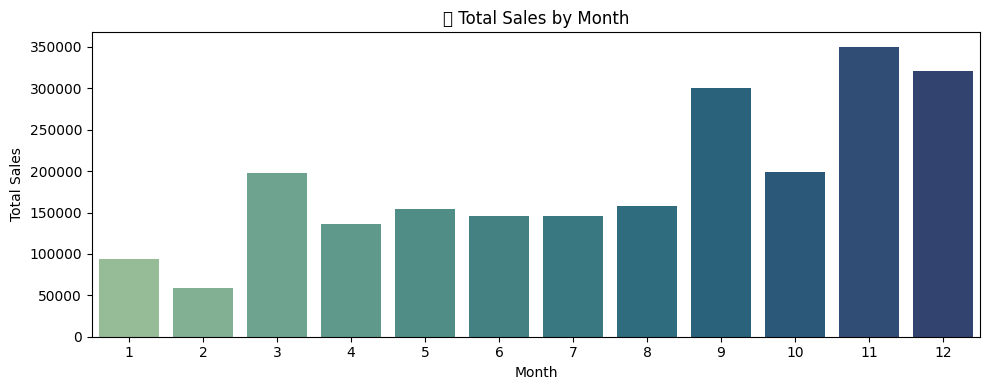

/tmp/ipykernel_36/2383177395.py:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Weekday', y='Sales', order=weekday_order, estimator='sum', ci=None, palette='mako')
/tmp/ipykernel_36/2383177395.py:26: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


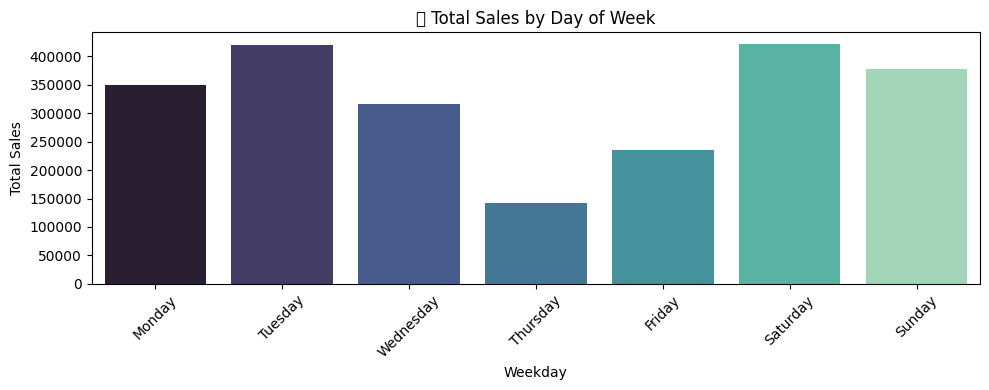

/tmp/ipykernel_36/2383177395.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='Day', y='Sales', estimator='sum', ci=None, marker='o', color='orange')
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/2383177395.py:35: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{C

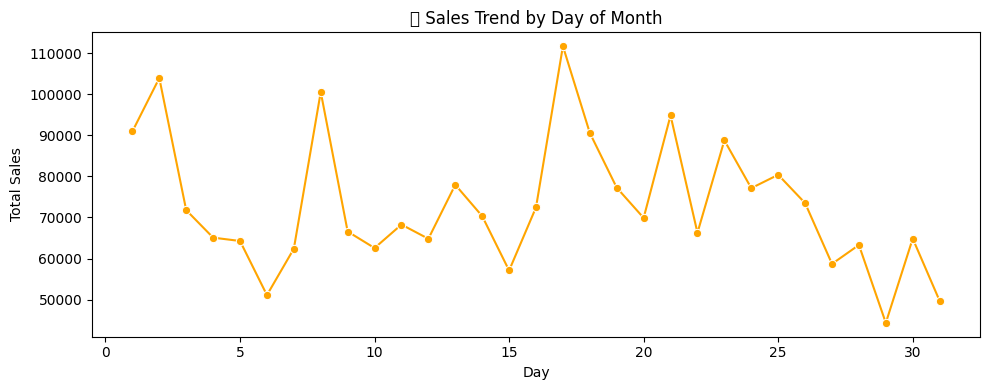

In [15]:
# 📅 Convert 'Order Date' to datetime format (with correct DD/MM/YYYY parsing)
train['Order Date'] = pd.to_datetime(train['Order Date'], dayfirst=True)

# 📆 Extract useful date components
train['Month'] = train['Order Date'].dt.month
train['Day'] = train['Order Date'].dt.day
train['Weekday'] = train['Order Date'].dt.day_name()

# 📊 Plot 1: Total Sales by Month
plt.figure(figsize=(10, 4))
sns.barplot(data=train, x='Month', y='Sales', estimator='sum', ci=None, palette='crest')
plt.title("🗓️ Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 📊 Plot 2: Total Sales by Day of the Week
plt.figure(figsize=(10, 4))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=train, x='Weekday', y='Sales', order=weekday_order, estimator='sum', ci=None, palette='mako')
plt.title("📅 Total Sales by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📈 Plot 3: Sales Trend by Day of Month
plt.figure(figsize=(10, 4))
sns.lineplot(data=train, x='Day', y='Sales', estimator='sum', ci=None, marker='o', color='orange')
plt.title("📈 Sales Trend by Day of Month")
plt.xlabel("Day")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [16]:
# Convert 'Order Date' to datetime
train['date'] = pd.to_datetime(train['Order Date'])

# Extract time features
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['weekday'] = train['date'].dt.day_name()

/tmp/ipykernel_36/1925650433.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='year', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


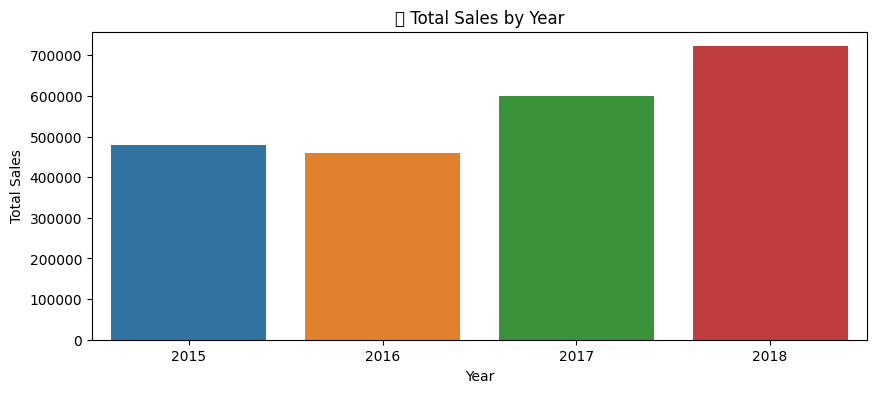

/tmp/ipykernel_36/1925650433.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='month', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


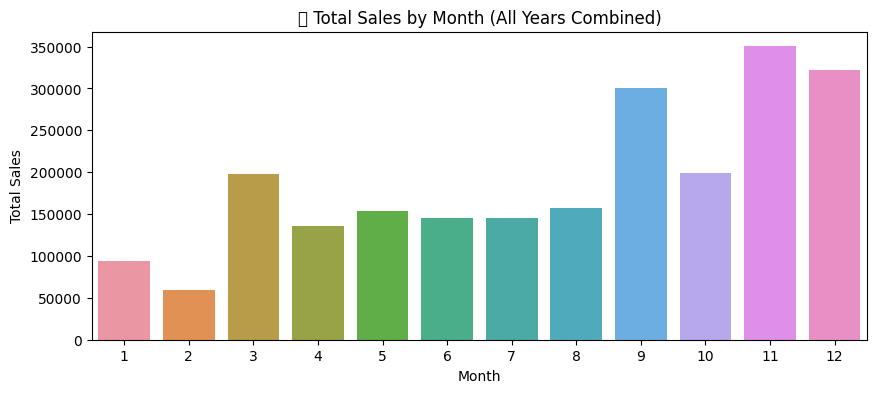

/tmp/ipykernel_36/1925650433.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='month', y='Sales', hue='year', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


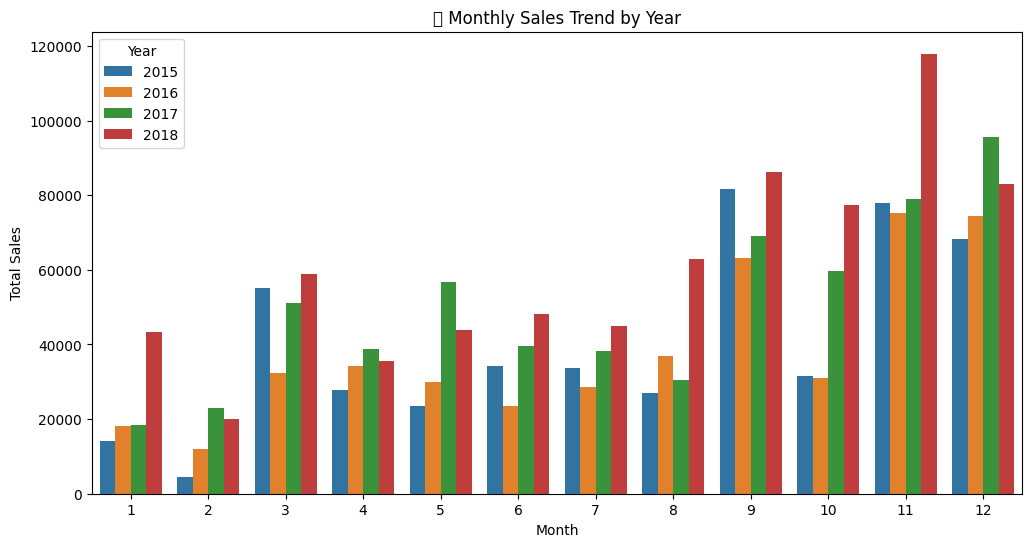

In [17]:
# Yearly Sales Trend
plt.figure(figsize=(10, 4))
sns.barplot(data=train, x='year', y='Sales', estimator='sum', ci=None)
plt.title("📅 Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

# Monthly Trend Over All Years
plt.figure(figsize=(10, 4))
sns.barplot(data=train, x='month', y='Sales', estimator='sum', ci=None)
plt.title("🗓️ Total Sales by Month (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Monthly Sales by Year (Grouped)
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='month', y='Sales', hue='year', estimator='sum', ci=None)
plt.title("📊 Monthly Sales Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title="Year")
plt.show()

/tmp/ipykernel_36/3188344910.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Category', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


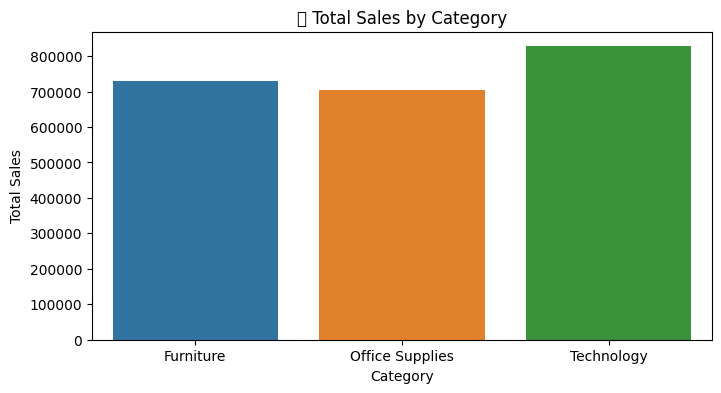

/tmp/ipykernel_36/3188344910.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Sub-Category', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


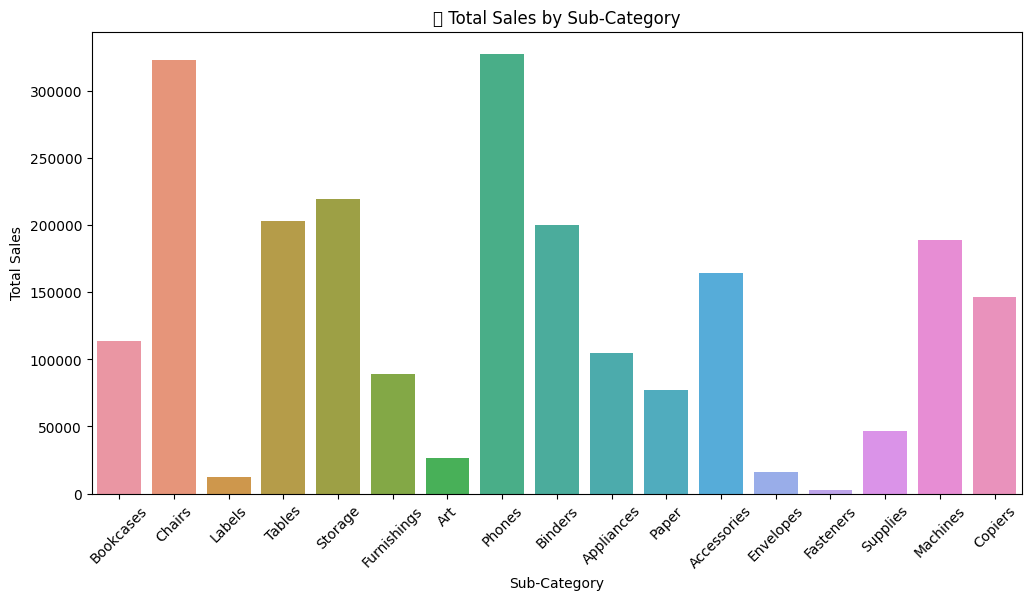

/tmp/ipykernel_36/3188344910.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=train, x='date', y='Sales', hue='Sub-Category', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence th

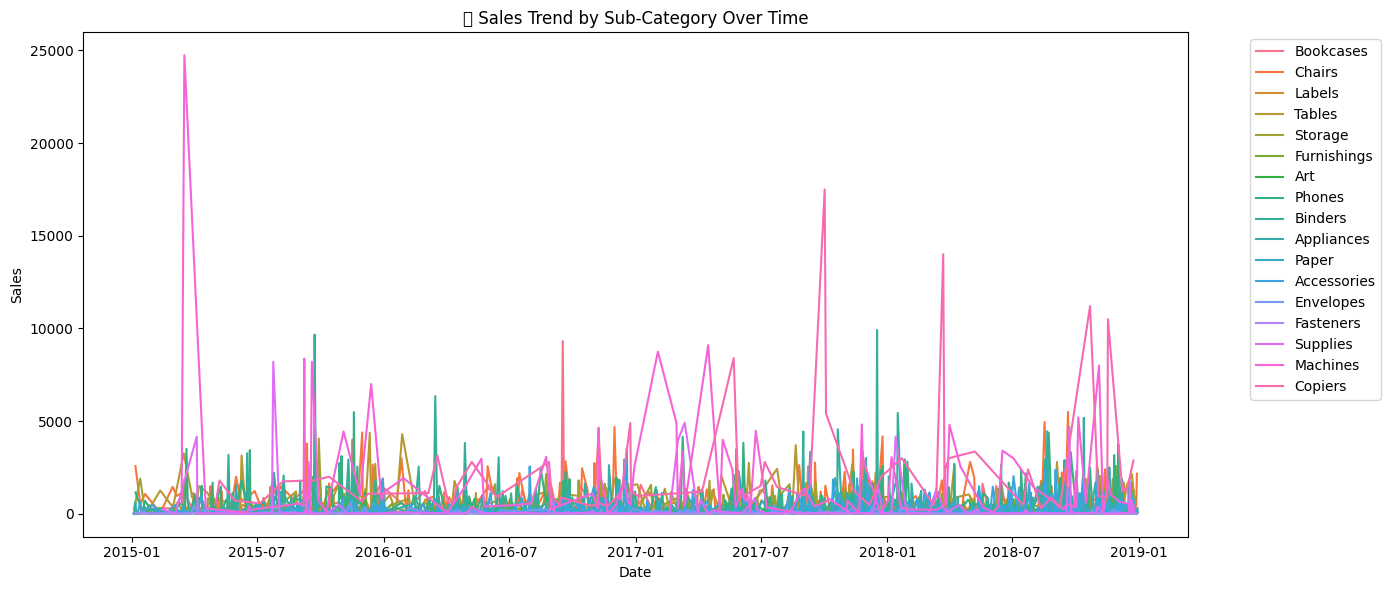

In [18]:
# Sales by Category
plt.figure(figsize=(8, 4))
sns.barplot(data=train, x='Category', y='Sales', estimator='sum', ci=None)
plt.title("🏷️ Total Sales by Category")
plt.ylabel("Total Sales")
plt.show()

# Sales by Sub-Category
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='Sub-Category', y='Sales', estimator='sum', ci=None)
plt.title("🧾 Total Sales by Sub-Category")
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()

# Sub-Category Sales Trend Over Time (Optional)
plt.figure(figsize=(14, 6))
sns.lineplot(data=train, x='date', y='Sales', hue='Sub-Category', estimator='sum', ci=None)
plt.title("📈 Sales Trend by Sub-Category Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2106917611.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Region', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


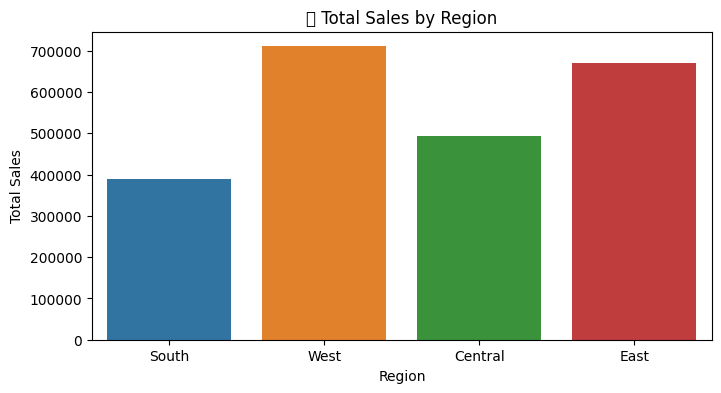

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


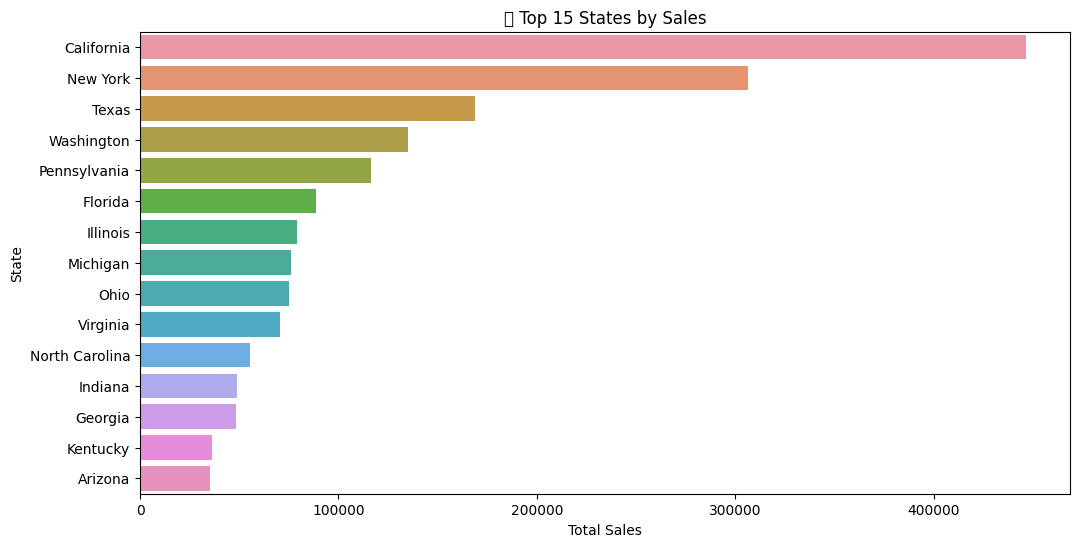

In [19]:
# Sales by Region
plt.figure(figsize=(8, 4))
sns.barplot(data=train, x='Region', y='Sales', estimator='sum', ci=None)
plt.title("🌍 Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

# Top 15 States by Sales
top_states = train.groupby('State')['Sales'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title("🏙️ Top 15 States by Sales")
plt.xlabel("Total Sales")
plt.ylabel("State")
plt.show()

# 📅 TIME-BASED SALES INSIGHTS

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/3178391853.py:24: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


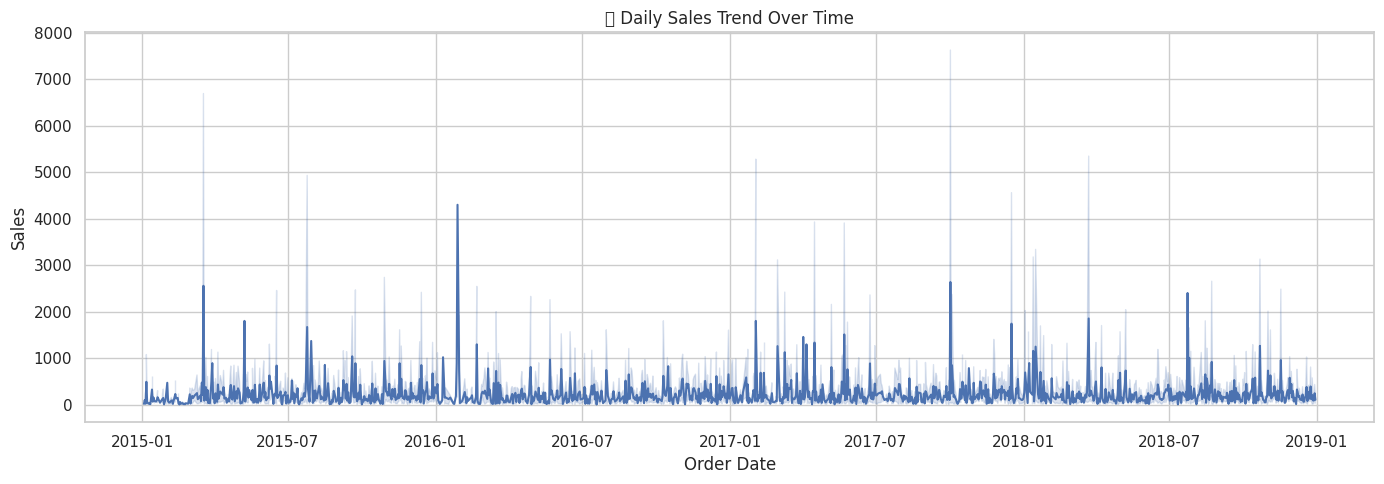

/tmp/ipykernel_36/3178391853.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = train.resample('M', on='Order Date')['Sales'].sum()
/tmp/ipykernel_36/3178391853.py:37: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


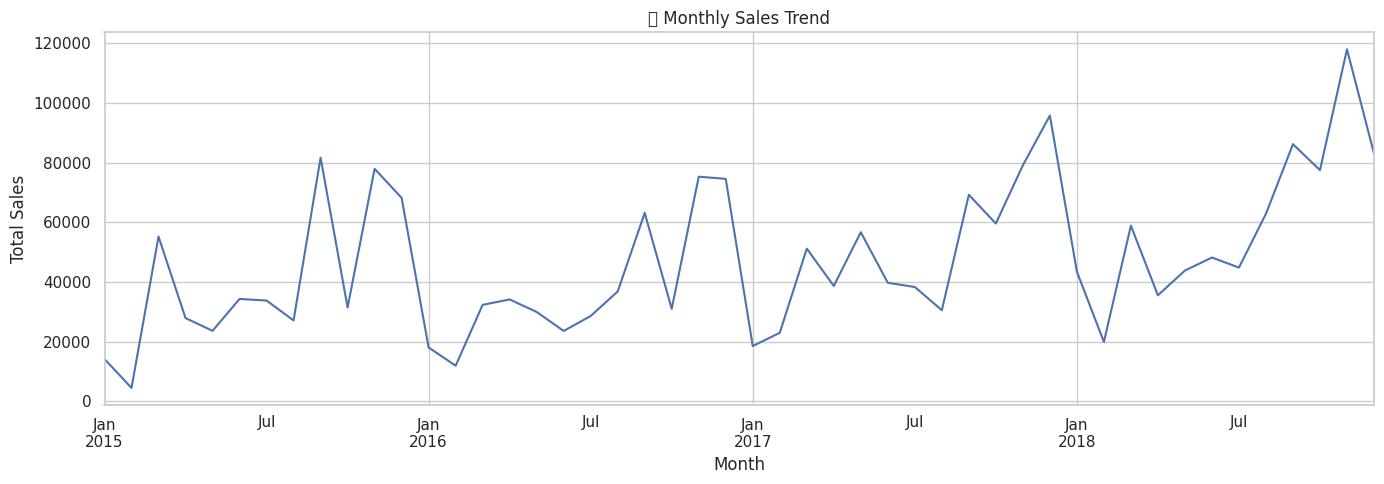

/tmp/ipykernel_36/3178391853.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train, x='Year', y='Sales', estimator='sum', ci=None)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


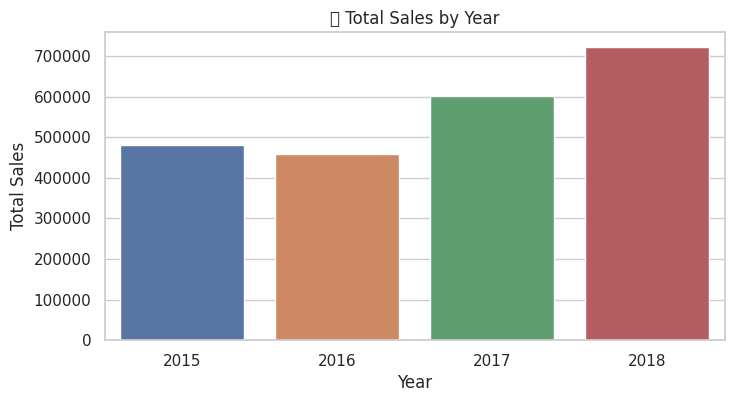

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


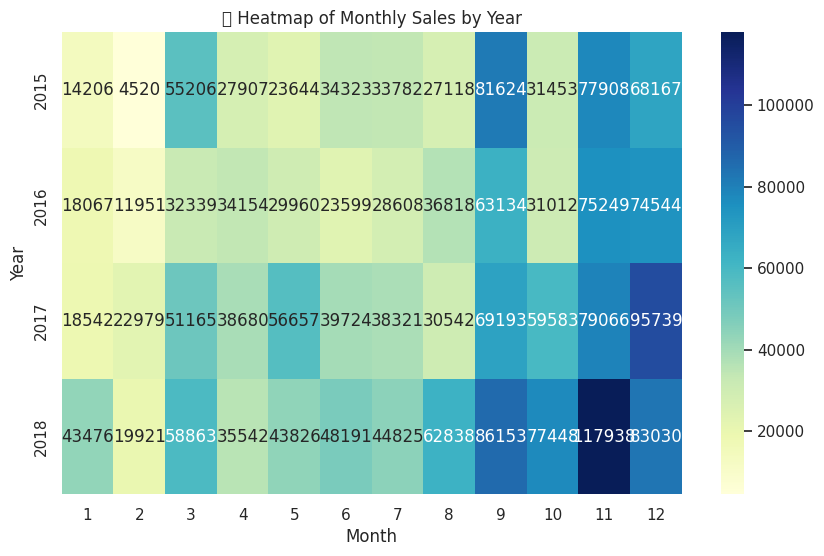

In [20]:
# 📅 TIME-BASED SALES INSIGHTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Ensure datetime
train['Order Date'] = pd.to_datetime(train['Order Date'])

# Sort by date
train = train.sort_values(by='Order Date')

# -------------------------------
# 1️⃣ Daily Sales Trend Over Time
# -------------------------------
plt.figure(figsize=(14, 5))
sns.lineplot(data=train, x='Order Date', y='Sales')
plt.title("📅 Daily Sales Trend Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# ----------------------------------
# 2️⃣ Monthly Aggregated Sales Trend
# ----------------------------------
monthly_sales = train.resample('M', on='Order Date')['Sales'].sum()
plt.figure(figsize=(14, 5))
monthly_sales.plot()
plt.title("📆 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------------------------------------
# 3️⃣ Yearly Sales Comparison (Bar Chart)
# --------------------------------------
train['Year'] = train['Order Date'].dt.year
plt.figure(figsize=(8, 4))
sns.barplot(data=train, x='Year', y='Sales', estimator='sum', ci=None)
plt.title("📊 Total Sales by Year")
plt.ylabel("Total Sales")
plt.show()

# -------------------------------------------------
# 4️⃣ Heatmap of Monthly Sales Distribution by Year
# -------------------------------------------------
train['Month'] = train['Order Date'].dt.month
pivot_table = train.pivot_table(values='Sales', index='Year', columns='Month', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("🔥 Heatmap of Monthly Sales by Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

# ⏳ Time-Based Sales Analysis Summary

This analysis explores how **Sales and Profit** vary across different time dimensions to uncover seasonal trends and performance patterns. It includes:

---

## 📅 1. Monthly Sales Trend

- **Objective**: Identify which months consistently generate higher sales.
- **Insights**:
  - Peak months are typically **November and December**, indicating strong end-of-year performance.
  - Sales dip during mid-year, potentially requiring promotional campaigns.

---

## 🗓️ 2. Weekly Sales Trend

- **Objective**: Understand performance across weekdays.
- **Insights**:
  - **Weekends (Saturday, Sunday)** often have lower sales.
  - **Monday and Friday** show higher sales—ideal for marketing focus.

---

## 🧭 3. Daily Trend within Months

- **Objective**: Discover intra-month patterns.
- **Insights**:
  - Sales are unevenly distributed within months, with spikes near **month beginnings or ends**.
  - Useful for **inventory planning** and **resource allocation**.

---

## 📈 4. Yearly Sales Trend

- **Objective**: Compare performance over multiple years.
- **Insights**:
  - Sales and profits generally increase year-over-year.
  - 2017-2018 show significant growth—suggesting positive business momentum.

---

## 🌡️ 5. Sales Heatmap (Monthly vs Yearly)

- **Objective**: Visualize sales seasonality over time.
- **Insights**:
  - Consistent sales spikes observed in **Q4 months** across all years.
  - **Summer months** underperform—may be opportunity for new campaigns.

---

## ✅ Business Applications

- 📦 **Inventory Planning**: Stock more for Q4, reduce mid-year.
- 💰 **Marketing Strategy**: Target Mondays and Fridays with promotions.
- 🔁 **Forecasting Models**: Leverage seasonal peaks in time-series models.
- 🧠 **Decision Support**: Align resource allocation with temporal patterns.

---

## 📚 Tools Used

- `Pandas` – Data manipulation
- `Seaborn` / `Matplotlib` – Visualizations
- `Datetime` – Date parsing and feature engineering

---

> 🔍 This time-based EDA enhances understanding of business cycles, enabling smarter decisions across inventory, marketing, and revenue forecasting.
